# Importing Libraries

In [1]:
import rasterio
import matplotlib.pyplot as plt

In [27]:
from rasterio.plot import show


In [2]:
from lightning.pytorch import Trainer
from torch.utils.data import DataLoader

from torchgeo.datamodules import InriaAerialImageLabelingDataModule
from torchgeo.datasets import CDL, Landsat7, Landsat8, VHR10, stack_samples
from torchgeo.samplers import RandomGeoSampler
from torchgeo.trainers import SemanticSegmentationTask

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import xarray as xr

### Importing LandSAT8 data - Downloaded from the USGS website

In [7]:
# landsat7 = Landsat7(root="", bands=["B1", ..., "B7"])
landsat8 = Landsat8(root="..\\Data\\Remote Sensing\\LandSat\\Iowa", bands=["B1", "B2", "B3", "B4", "B5", "B6", "B7"])
landsat = landsat8

### Creating a datasampler for the downloaded data

In [21]:
sampler = RandomGeoSampler(landsat8, size=256, length=1000)

In [113]:
sample = next(iter(sampler))
sample

BoundingBox(minx=595349.1133636236, maxx=603029.1133636236, miny=3505288.2867461443, maxy=3512968.2867461443, mint=1671908400.0, maxt=1671994799.999999)

#### Loading 256x256 patches from the datasampler

Sample is a dictionary with the following keys:
- 'image': A tensor of shape (256, 256, 7) containing the image
- 'BoundingBox'
- 'crs'

In [124]:
img_sample = landsat[sample]
img_sample

{'crs': CRS.from_epsg(32615),
 'bbox': BoundingBox(minx=595349.1133636236, maxx=603029.1133636236, miny=3505288.2867461443, maxy=3512968.2867461443, mint=1671908400.0, maxt=1671994799.999999),
 'image': tensor([[[ 8409.,  7747.,  7653.,  ...,  7710.,  7675.,  7643.],
          [ 8062.,  7642.,  7563.,  ...,  7627.,  7675.,  7649.],
          [ 7882.,  7708.,  7565.,  ...,  7655.,  7685.,  7635.],
          ...,
          [ 8154.,  8050.,  8012.,  ...,  8325.,  8241.,  8310.],
          [ 8737.,  8377.,  8012.,  ...,  8166.,  8145.,  8234.],
          [ 8849.,  8532.,  7912.,  ...,  8062.,  8223.,  8196.]],
 
         [[ 8645.,  7922.,  7752.,  ...,  7803.,  7776.,  7736.],
          [ 8245.,  7804.,  7714.,  ...,  7716.,  7729.,  7714.],
          [ 8074.,  7841.,  7738.,  ...,  7773.,  7734.,  7820.],
          ...,
          [ 8458.,  8276.,  8142.,  ...,  8432.,  8391.,  8468.],
          [ 9159.,  8654.,  8240.,  ...,  8286.,  8316.,  8384.],
          [ 9257.,  8847.,  8073.,  ...

In [125]:
img_sample.keys()

dict_keys(['crs', 'bbox', 'image'])

### Shape of image

In [116]:
img_sample['image'].shape

torch.Size([7, 256, 256])

### Scaling images

In [117]:
def scale_image(item: dict):
    item['image'] = item['image'] * 0.0001
    return item

In [126]:
img_sample = scale_image(img_sample)

### Taking out RGB bands 3 - R, 2 - G, 1 - B

In [127]:
rgb = img_sample['image'][[3, 2, 1], :, :, ]

In [128]:
# convert rgb tensor to numpy array
rgb = rgb.numpy()


In [129]:
rgb = rgb.transpose(1, 2, 0)
rgb.shape


(256, 256, 3)

In [130]:
# clamp values to range [0, 1]
rgb = np.clip(rgb, 0, 1)

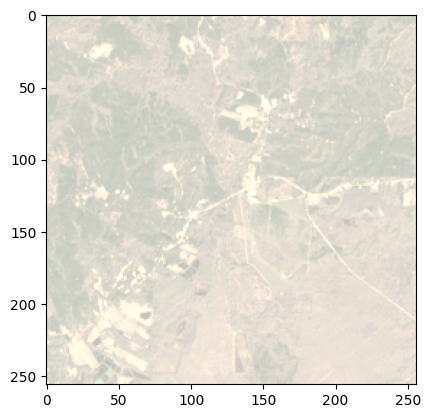

In [131]:
plt.imshow(rgb)

### TODO LIST:
- [x] Download Landsat8 data
- [x] Create a datasampler for the downloaded data
- [x] Load 256x256 patches from the datasampler
- [x] Scale images
- [x] Take out RGB bands 3 - R, 2 - G, 1 - B
- [ ] Download Crop Data Layer (CDL) data
- [ ] Download more Landsat8 data
- [ ] Merge CDL data with Landsat8 data using TorchGeo's & operator
- [ ] Create a dataloader
- [ ] Create a model